<a href="https://colab.research.google.com/github/Polinysha/-/blob/main/%D0%B0%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import math

rng = np.random.default_rng(seed=121)
random_state = 121
n_features = 106
n_samples = 20_000

# создадим датасет для классификации
x, y = make_classification(n_samples=n_samples, random_state=random_state, n_features=n_features)
df = pd.DataFrame(x, columns=[f'feature_{k}' for k in range(n_features)])
df['target'] = y

In [ ]:
df['golden_feature_1'] = df['target'] + rng.normal(size = len(y), scale = 0.4) # здесь шума добавили побольше -- фича будет послабее
df['golden_feature_2'] = df['target'] + df['golden_feature_1']  + rng.normal(size = len(y), scale = 0.35)#  здесь шума добавили поменьше -- фича будет посильнее

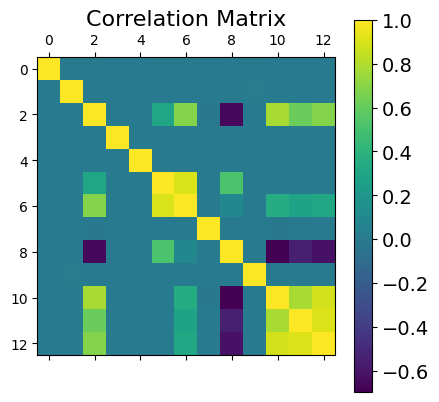

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

<Axes: >

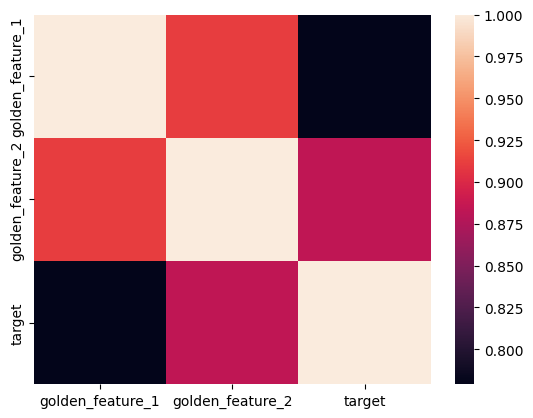

In [ ]:
import seaborn as sns
corr = df[['golden_feature_1','golden_feature_2','target']].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 20, max_features = 0.5, random_state = random_state)
rf.fit(df.drop('target', axis = 1), y)

RandomForestClassifier(max_depth=20, max_features=0.5, random_state=121)

In [ ]:
from tabulate import tabulate
from operator import itemgetter
t = []
for feature, importance in zip(df.drop('target', axis = 1).columns, rf.feature_importances_):
  t.append([feature, importance])
t = sorted(t, reverse = True, key = itemgetter(1))
print(tabulate(t, headers = ['Признак', 'Важность']))

Признак             Важность
----------------  ----------
golden_feature_2  0.607862
feature_2         0.176073
golden_feature_1  0.114753
feature_8         0.0741608
feature_6         0.0101138
feature_5         0.00778537
feature_0         0.00179993
feature_3         0.00170889
feature_7         0.00146428
feature_9         0.00145848
feature_4         0.00143497
feature_1         0.00138557


In [ ]:
rf_09 = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=0.9, random_state=random_state)
rf_09.fit(df.drop('target', axis=1), y)

t = []
for feature, importance in zip(df.drop('target', axis=1).columns, rf_09.feature_importances_):
    t.append([feature, importance])
t = sorted(t, reverse=True, key=itemgetter(1))
print(tabulate(t, headers=['Признак', 'Важность']))

positions = [item[0] for item in t]
gf1_position = positions.index('golden_feature_1') + 1
print(f"\nПозиция golden_feature_1: {gf1_position}")

Признак             Важность
----------------  ----------
golden_feature_2  0.835539
feature_2         0.102261
feature_8         0.042239
feature_5         0.00473362
golden_feature_1  0.00371812
feature_6         0.00256499
feature_0         0.00169325
feature_3         0.00163647
feature_4         0.00143691
feature_1         0.00140603
feature_9         0.00140039
feature_7         0.00137217

Позиция golden_feature_1: 5


In [ ]:
df[['golden_feature_1','golden_feature_2','target']].corr()

,golden_feature_1,golden_feature_2,target
golden_feature_1,1.000000,0.910394,0.779165
golden_feature_2,0.910394,1.000000,0.883246
target,0.779165,0.883246,1.000000


In [ ]:
rf_no_gf2 = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=0.9, random_state=random_state)
rf_no_gf2.fit(df.drop(['target', 'golden_feature_2'], axis=1), y)

t = []
for feature, importance in zip(df.drop(['target', 'golden_feature_2'], axis=1).columns, rf_no_gf2.feature_importances_):
    t.append([feature, importance])
t = sorted(t, reverse=True, key=itemgetter(1))
print(tabulate(t, headers=['Признак', 'Важность']))

positions = [item[0] for item in t]
gf1_position_no_gf2 = positions.index('golden_feature_1') + 1
print(f"Позиция golden_feature_1: {gf1_position_no_gf2}")

Признак             Важность
----------------  ----------
feature_2         0.605594
golden_feature_1  0.215889
feature_8         0.131145
feature_5         0.0130605
feature_6         0.00774722
feature_0         0.00467528
feature_4         0.00464695
feature_9         0.00454185
feature_7         0.00430285
feature_1         0.00422526
feature_3         0.00417155
Позиция golden_feature_1: 2


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, colsample_bytree=0.5, random_state=43)
xgb.fit(df.drop('target', axis=1), y)

t = []
for feature, importance in zip(df.drop('target', axis=1).columns, xgb.feature_importances_):
    t.append([feature, importance])
t = sorted(t, reverse=True, key=itemgetter(1))
print(tabulate(t, headers=['Признак', 'Важность']))

Признак             Важность
----------------  ----------
golden_feature_2  0.619467
feature_2         0.221745
feature_8         0.0638065
golden_feature_1  0.0492883
feature_6         0.0170231
feature_5         0.0134591
feature_9         0.00279441
feature_3         0.0027107
feature_7         0.00263437
feature_4         0.00243511
feature_0         0.00234785
feature_1         0.00228789


In [ ]:
xgb_10 = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, colsample_bytree=1.0, random_state=43)
xgb_10.fit(df.drop('target', axis=1), y)

t = []
for feature, importance in zip(df.drop('target', axis=1).columns, xgb_10.feature_importances_):
    t.append([feature, importance])
t = sorted(t, reverse=True, key=itemgetter(1))
print(tabulate(t, headers=['Признак', 'Важность']))

positions = [item[0] for item in t]
gf1_position_xgb = positions.index('golden_feature_1') + 1
print(f"Позиция golden_feature_1: {gf1_position_xgb}")

Признак             Важность
----------------  ----------
golden_feature_2  0.835641
feature_8         0.0562887
feature_2         0.055019
feature_5         0.0133256
feature_6         0.00698487
golden_feature_1  0.00582277
feature_3         0.00516934
feature_9         0.00475428
feature_1         0.00455164
feature_0         0.00439369
feature_7         0.00408448
feature_4         0.00396448
Позиция golden_feature_1: 6


In [ ]:
xgb_no_gf2 = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, colsample_bytree=1.0, random_state=43)
xgb_no_gf2.fit(df.drop(['target', 'golden_feature_2'], axis=1), y)

t = []
for feature, importance in zip(df.drop(['target', 'golden_feature_2'], axis=1).columns, xgb_no_gf2.feature_importances_):
    t.append([feature, importance])
t = sorted(t, reverse=True, key=itemgetter(1))
print(tabulate(t, headers=['Признак', 'Важность']))

positions = [item[0] for item in t]
gf1_position_xgb_no_gf2 = positions.index('golden_feature_1') + 1
print(f"Позиция golden_feature_1: {gf1_position_xgb_no_gf2}")

Признак             Важность
----------------  ----------
feature_2         0.72251
feature_8         0.11547
golden_feature_1  0.101766
feature_5         0.0138126
feature_6         0.0092117
feature_0         0.00706574
feature_1         0.00642251
feature_3         0.00633196
feature_9         0.00609246
feature_7         0.00598582
feature_4         0.00533143
Позиция golden_feature_1: 3


In [ ]:
for reg_lambda in [0.1, 1, 5, 10, 30, 60, 100, 500, 1000]:
    xgb_reg = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100,
                           colsample_bytree=1.0, reg_lambda=reg_lambda, random_state=43)
    xgb_reg.fit(df.drop('target', axis=1), y)

    importances = list(zip(df.drop('target', axis=1).columns, xgb_reg.feature_importances_))
    importances_sorted = sorted(importances, reverse=True, key=itemgetter(1))
    positions = [item[0] for item in importances_sorted]
    gf1_pos = positions.index('golden_feature_1') + 1
    print(f"reg_lambda = {reg_lambda}: позиция golden_feature_1 = {gf1_pos}")

xgb_1000 = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100,
                        colsample_bytree=1.0, reg_lambda=1000, random_state=43)
xgb_1000.fit(df.drop('target', axis=1), y)

t = []
for feature, importance in zip(df.drop('target', axis=1).columns, xgb_1000.feature_importances_):
    t.append([feature, importance])
t = sorted(t, reverse=True, key=itemgetter(1))
print("\n" + tabulate(t, headers=['Признак', 'Важность']))

positions = [item[0] for item in t]
gf1_position_reg = positions.index('golden_feature_1') + 1
print(f"\nПри reg_lambda = 1000 позиция golden_feature_1: {gf1_position_reg}")

reg_lambda = 0.1: позиция golden_feature_1 = 6
reg_lambda = 1: позиция golden_feature_1 = 6
reg_lambda = 5: позиция golden_feature_1 = 6
reg_lambda = 10: позиция golden_feature_1 = 6
reg_lambda = 30: позиция golden_feature_1 = 6
reg_lambda = 60: позиция golden_feature_1 = 6
reg_lambda = 100: позиция golden_feature_1 = 6
reg_lambda = 500: позиция golden_feature_1 = 11
reg_lambda = 1000: позиция golden_feature_1 = 10

Признак              Важность
----------------  -----------
golden_feature_2  0.83091
feature_2         0.114693
feature_8         0.0519474
feature_6         0.00141991
feature_5         0.000474385
feature_3         0.00020042
feature_1         0.000103214
feature_7         7.09503e-05
feature_0         5.29003e-05
golden_feature_1  5.09226e-05
feature_4         4.52857e-05
feature_9         3.10408e-05

При reg_lambda = 1000 позиция golden_feature_1: 10


reg_lambda =  0.1: важность = 0.006860, позиция = 6
reg_lambda =    1: важность = 0.005823, позиция = 6
reg_lambda =    5: важность = 0.004307, позиция = 6
reg_lambda =   10: важность = 0.003975, позиция = 6
reg_lambda =   30: важность = 0.003343, позиция = 6
reg_lambda =   60: важность = 0.002080, позиция = 6
reg_lambda =  100: важность = 0.001164, позиция = 6
reg_lambda =  500: важность = 0.000107, позиция = 11
reg_lambda = 1000: важность = 0.000051, позиция = 10


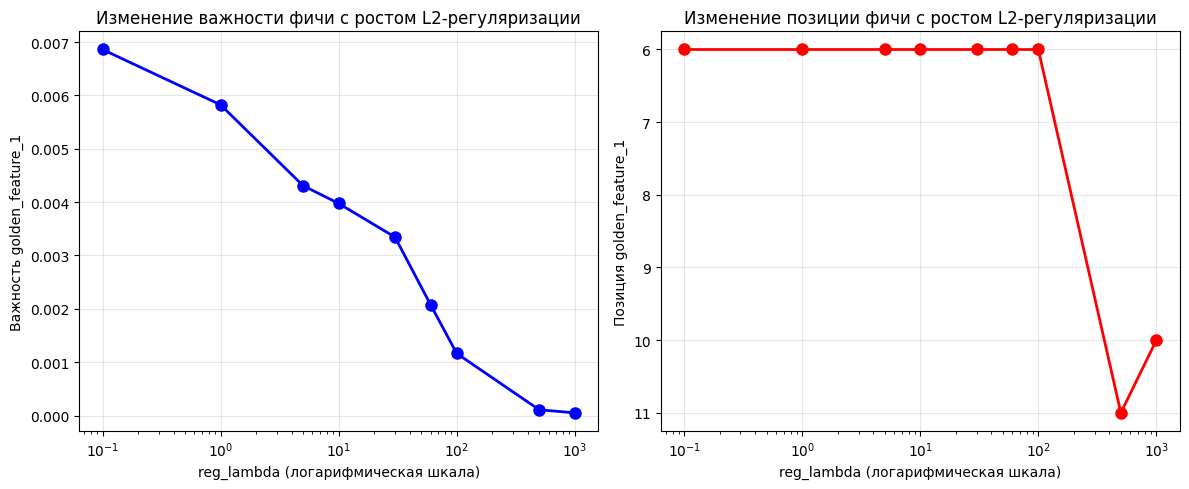

In [ ]:
import matplotlib.pyplot as plt

reg_lambdas = [0.1, 1, 5, 10, 30, 60, 100, 500, 1000]
gf1_importances = []
gf1_positions = []

for reg_lambda in reg_lambdas:
    xgb_reg = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100,
                           colsample_bytree=1.0, reg_lambda=reg_lambda, random_state=43)
    xgb_reg.fit(df.drop('target', axis=1), y)

    importances = dict(zip(df.drop('target', axis=1).columns, xgb_reg.feature_importances_))
    importances_sorted = sorted(importances.items(), reverse=True, key=lambda x: x[1])

    positions = [item[0] for item in importances_sorted]
    gf1_pos = positions.index('golden_feature_1') + 1
    gf1_importance = importances['golden_feature_1']

    gf1_importances.append(gf1_importance)
    gf1_positions.append(gf1_pos)

    print(f"reg_lambda = {reg_lambda:4}: важность = {gf1_importance:.6f}, позиция = {gf1_pos}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(reg_lambdas, gf1_importances, 'bo-', linewidth=2, markersize=8)
ax1.set_xscale('log')
ax1.set_xlabel('reg_lambda (логарифмическая шкала)')
ax1.set_ylabel('Важность golden_feature_1')
ax1.set_title('Изменение важности фичи с ростом L2-регуляризации')
ax1.grid(True, alpha=0.3)

ax2.plot(reg_lambdas, gf1_positions, 'ro-', linewidth=2, markersize=8)
ax2.set_xscale('log')
ax2.set_xlabel('reg_lambda (логарифмическая шкала)')
ax2.set_ylabel('Позиция golden_feature_1')
ax2.set_title('Изменение позиции фичи с ростом L2-регуляризации')
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()